In [ ]:
#refs
# https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
# http://scipy-cookbook.readthedocs.io/items/LinearRegression.html

# https://www.r-bloggers.com/r-python-and-sas-getting-started-with-linear-regression/
# https://www.r-bloggers.com/r-and-python-theory-of-linear-least-squares/

In [ ]:
## import modules

In [2]:
import matplotlib
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
        

In [ ]:
## Combine Data sets 

In [4]:
# combiDF2b.to_csv('combined_mvInfo_subset_MatchIDX_cleaned')
combiDF = pd.read_csv('mvInfo_subset_MatchIDX_COMBINEDcleaned')

In [ ]:
combiDF.columns

In [5]:
combiDF0 = combiDF.loc[:,['mID', 'mName', 'mYrank', 'mStudio', 
                      'openWkdate','DURrelease', 'openDTheatre', 'openDGross', 'totalDTheatre',
                       'PD_budget', 'totalDGross', 'W_gross', 'F_gross', 'Genre', 'mv_runtime',
           'mv_Dir', 'mv_Prod', 'mv_Comp', 'OscarNom', 'OscarInfoURL', 'Animation',
       'Adventure', 'Action', 'Comedy', 'Drama', 'Documentary', 'Family',
       'Fantasy', 'Foreign', 'Horror', 'Period', 'Sci-Fi', 'Thriller',
       'Western', 'Romance', 'warnerbros', 'universal', 'fox', 'buenavista',
       'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
       'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
       'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate', 'dreamworks',
       'D_RtnOInvest', 'W_RtnOInvest', 'logD_RtnOInvest', 'logW_RtnOInvest',
       'logDURrelease', 'logOpenDGross', 'logTotalDGross', 'openYR', 'openWK',
       'openDay', 'openWkday']]


In [ ]:
combiDF0#.describe()

In [ ]:
# 

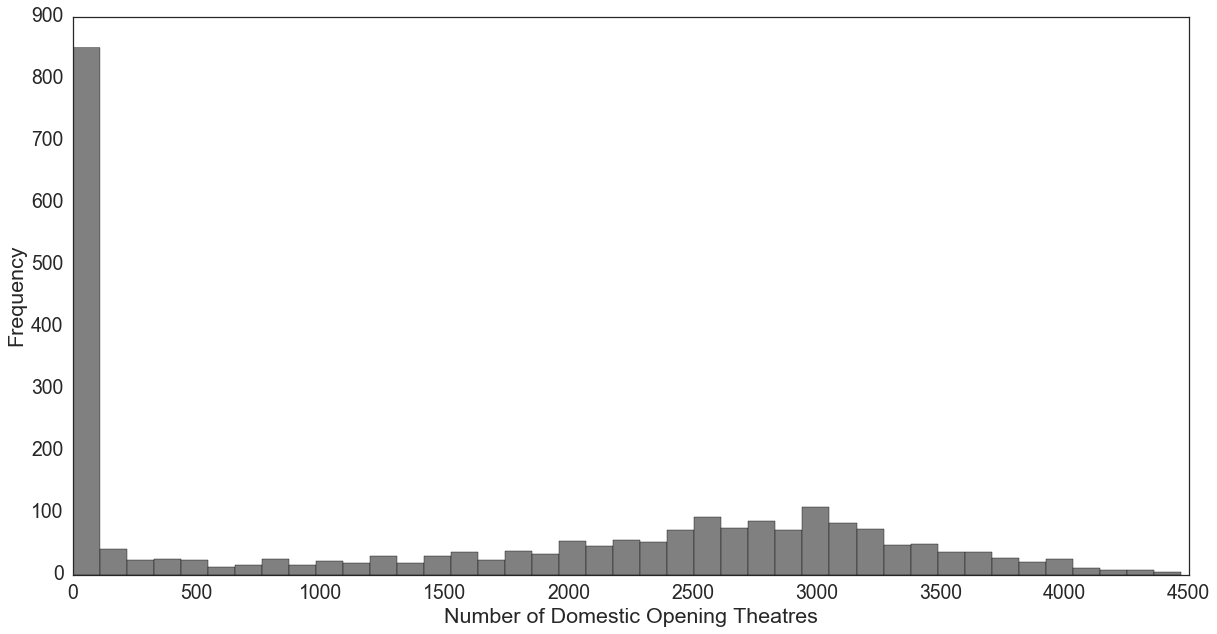

In [613]:
sns.set_style("white")
plt.figure(1,figsize=[20,10])
combiDF0.openDTheatre.plot.hist(41, color='grey')
plt.xlabel('Number of Domestic Opening Theatres')

In [6]:
genreList = ['Animation', 'Adventure', 'Action', 'Comedy', 'Drama', 'Documentary', 'Family','Fantasy', 'Foreign', 
'Horror', 'Period','Sci-Fi', 'Thriller','Western', 'Romance']


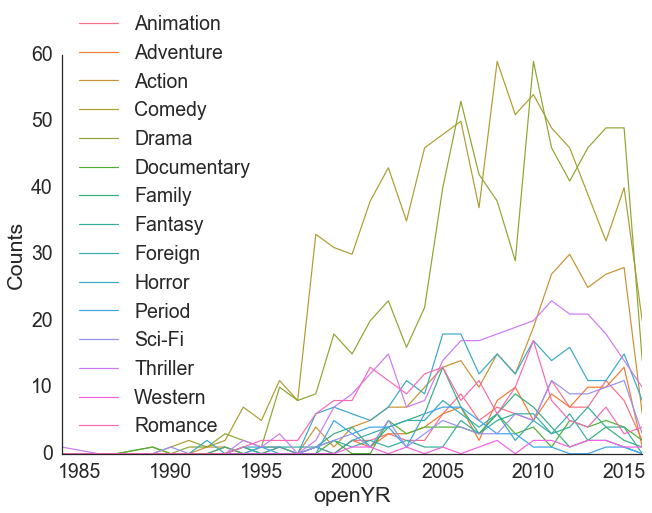

In [13]:
sns.set_style("white")
sns.set_palette("husl",15)
plt.figure(1,figsize=[30,40])
combiDF0.groupby(by=['openYR']).sum()[genreList].plot()
plt.ylabel('Counts')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()
# combiDF0.groupby(by=['openYR']).sum()[[
#                                         'Animation',
#                                        'Adventure', 
#                                         'Action', 
#                                         'Comedy', 
#                                         'Drama', 
# #                                        'Documentary', 
#                                 #         'Family',
#                                 #        'Fantasy', #'Foreign',
#                                         'Horror', 
#                                         'Period', 
#                                         'Sci-Fi', 
#                                         'Thriller',
#                                 #        'Western', 
#                                        'Romance']].plot()

In [14]:
studioList = ['warnerbros', 'universal', 'fox', 'buenavista',
       'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
       'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
       'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate', 'dreamworks']

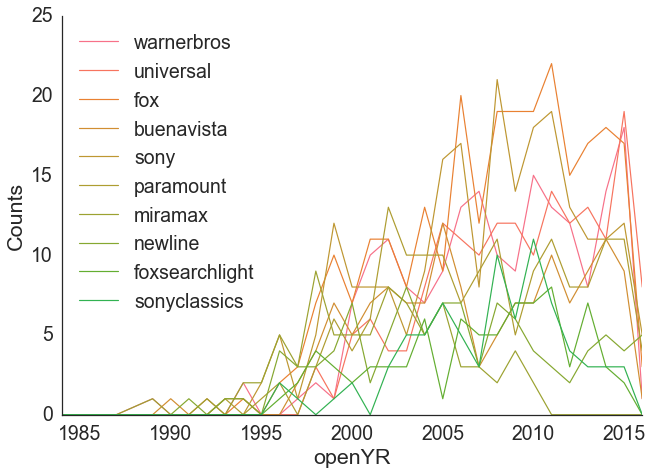

In [615]:
sns.set_palette("husl",25)
plt.figure(2,figsize=[20,30])
combiDF0.groupby(by=['openYR']).sum()[studioList[:10]].plot()
plt.ylabel('Counts')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()

In [12]:
# sns.set_palette("husl",14)
# studioGenreCounts = pd.DataFrame()
# for s in studioList:
#     studioGenreCounts = pd.concat([studioGenreCounts, combiDF0.groupby(by=[s]).sum()[['Animation',
#                                        'Adventure', 
#                                         'Action', 
#                                         'Comedy', 
#                                         'Drama', 
# #                                        'Documentary', 
#                                 #         'Family',
#                                 #        'Fantasy', #'Foreign',
#                                         'Horror', 
#                                         'Period', 
#                                         'Sci-Fi', 
#                                         'Thriller',
#                                 #        'Western', 
#                                        'Romance']] ], axis=0 ) 


#     print(combiDF0.groupby(by=[s]).sum()[['Animation',
#        'Adventure', 'Action', 'Comedy', 'Drama', 
# #        'Documentary', 
#         'Family',
#        'Fantasy', #'Foreign',
#         'Horror', 'Period', 'Sci-Fi', 'Thriller',
# #        'Western', 
#        'Romance']])

In [40]:
mvTotbyStudio = combiDF0.sum()[studioList]
mvTotbyStudio = mvTotbyStudio.to_frame('totalMvs')#.loc['warnerbros'].totalMvs
# mvTotbyStudio

In [35]:
# studioGenreCounts
# combiDF0.groupby(by=['fox']).sum()[['Animation',
#        'Adventure', 'Action', 'Comedy', 'Drama', 
#        'Documentary', 'Family',
#        'Fantasy', 'Foreign', 'Horror', 'Period', 'Sci-Fi', 'Thriller',
#        'Western', 
#        'Romance']].iloc[1,:]

DF00 = pd.DataFrame(None)

for s in studioList:
    StuMvTot = mvTotbyStudio.loc[s].totalMvs
    for g in genreList:
        tmp=combiDF0.groupby(by=[s]).sum()[g]#.iloc[1,:]
        if any(tmp.to_frame().index.values == 1):
            m0,m1 = tmp/StuMvTot
        else :
            m0 = tmp[0]/StuMvTot
            m1 = np.nan
        
#         DF00 = pd.concat([DF00, pd.DataFrame([dict(zip(['Studio', 'Genre','Count'], [s,g, m1]))],
#                                            columns=['Studio','Genre','Count'] ) ], axis=0 )

        DF00 = pd.concat([DF00, pd.DataFrame([dict(zip(['Studio', 'Genre','Percentage'], [s,g, m1]))],
                                           columns=['Studio','Genre','Percentage'] ) ], axis=0 )


In [45]:
DF00 = DF00.reset_index().iloc[:,1:]

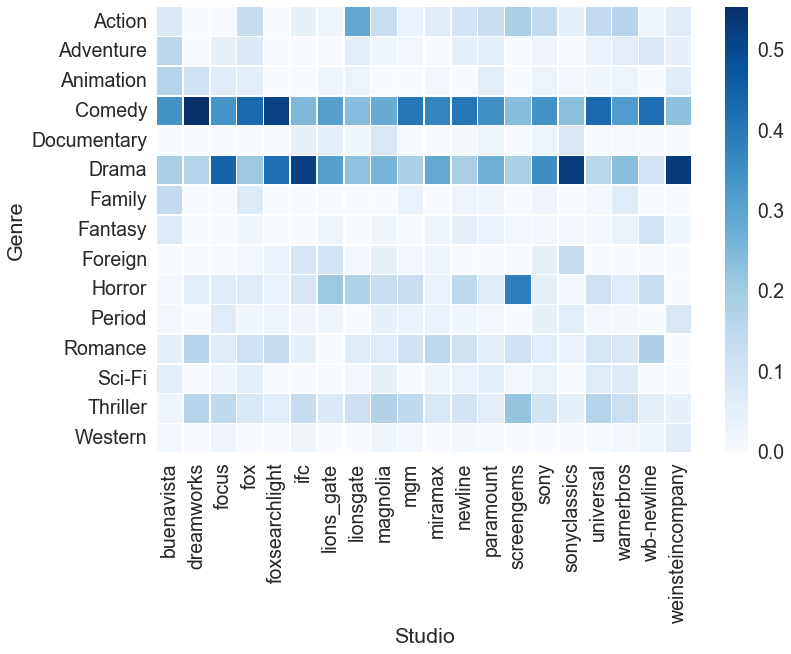

In [47]:
# DF00
# DF00pivot = DF00.pivot("Genre", "Studio", "Count")
DF00pivot = DF00.pivot("Genre", "Studio", "Percentage")
DF00pivot #.max().max() #
# Draw a heatmap with the numeric values in each cell
# sns.heatmap(DF0, annot=True, fmt="d", linewidths=.5)
plt.figure(3, figsize=[12,8])
sns.heatmap(DF00pivot, vmin=0, vmax=DF00pivot.max().max(), cmap="Blues", fmt="d", linewidths=.5)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 8})

In [15]:
test=(combiDF0[combiDF0['Animation']==1].groupby(by=[g])['logW_RtnOInvest'].mean())
# test.to_frame().iloc[1,:]==None
test.to_frame().index.values == 1
# df.index.values

array([False], dtype=bool)

In [16]:
DF0 = pd.DataFrame(None)

for s in studioList: #[:2]:
    for g in genreList:
        tmp = combiDF0[combiDF0[s]==1].groupby(by=[g])['logW_RtnOInvest'].median()
        if any(tmp.to_frame().index.values == 1):
            m0,m1 = tmp
        else :
            m0 = tmp[0]
            m1 = np.nan
        #print(s, g, m0, m1)
        DF0 = pd.concat([DF0, pd.DataFrame([dict(zip(['Studio','Genre','logWroi'], [s,g, m1]))],
                                           columns=['Studio','Genre','logWroi'] ) ], axis=0 )



In [ ]:
# pd.DataFrame([dict(zip(['studio','genre','logWroi'], [s,g, m1]))])

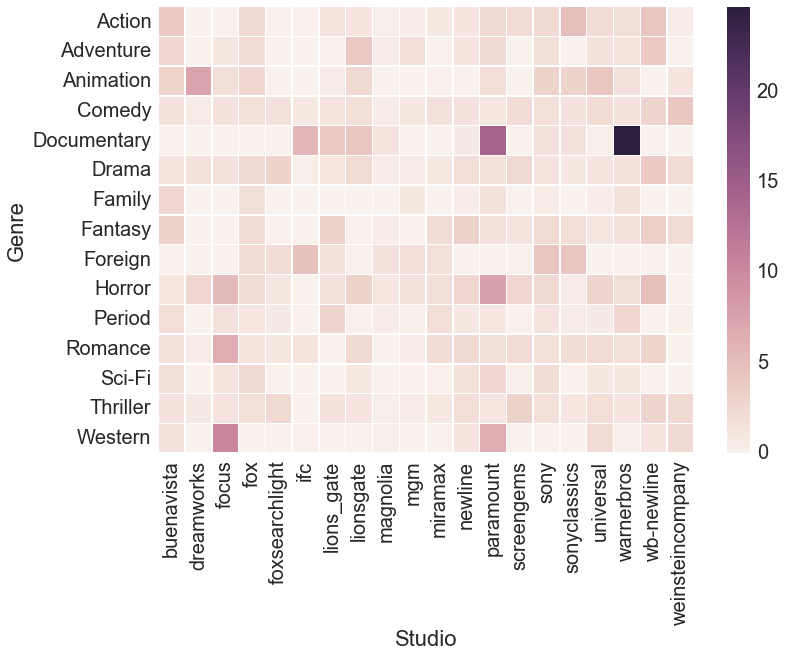

In [17]:
# DF0
DF0pivot = DF0.pivot("Genre", "Studio", "logWroi")
DF0pivot = np.exp(DF0pivot)
DF0pivot = DF0pivot.fillna(0)
DF0pivot #.max().max() #24.6920765832106
# Draw a heatmap with the numeric values in each cell
# sns.heatmap(DF0, annot=True, fmt="d", linewidths=.5)
plt.figure(4, figsize=[12,8])
sns.heatmap(DF0pivot, vmin=0, vmax=DF0pivot.max().max(), fmt="d", linewidths=.5) #,cmap="YlGnBu"
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 8})

In [ ]:
combiDF0[combiDF0['Documentary']==1]

In [ ]:
combiDF0[combiDF0[s]==1].groupby(by=[g])['logW_RtnOInvest'].mean().shape


In [ ]:
combiDF0[combiDF0['miramax']==1].groupby(by=['openYR'])['logW_RtnOInvest'].mean()

In [ ]:
combiDF0['totalDGross'].groupby(combiDF0['Adventure']).mean()

In [ ]:
combiDF0.columns

# Index([0'mID', 1'mName', 2'mYrank', 3'mStudio', 4'openWkdate', 5'DURrelease',
#        6'openDTheatre', 7'openDGross', 8'totalDTheatre', 9'PD_budget',
#        10'totalDGross', 11'W_gross', 12'F_gross', 13'Genre', 14'mv_runtime', 15'mv_Dir',
#        16'mv_Prod', 17'mv_Comp', 18'OscarNom', 19'OscarInfoURL', 20'Animation',
#        21'Adventure', 22'Action', 23'Comedy', 24'Drama', 25'Documentary', 26'Family',
#        27'Fantasy', 28'Foreign', 29'Horror', 30'Period', 31'Sci-Fi', 32'Thriller',
#        33'Western', 34'Romance', 35'warnerbros', 36'universal', 37'fox', 38'buenavista',
#        38'sony', 39'paramount', 40'miramax', 41'newline', 42'foxsearchlight',
#        43'sonyclassics', 44'lionsgate', 45'mgm', 46'screengems', 47'weinsteincompany',
#        48'focus', 49'magnolia', 50'ifc', 51'wb-newline', 52'lions_gate', 53'dreamworks',
#        54'D_RtnOInvest', 55'W_RtnOInvest', 56'logD_RtnOInvest', 57'logW_RtnOInvest',
#        58'logDURrelease', 59'logOpenDGross', 60'logTotalDGross', 61'openYR', 62'openWK',
#        63'openDay', 64'openWkday'],


In [ ]:
combiDF0.shape

In [ ]:
# EXAMINE SCATTER PLOTS 

# sns.pairplot(combiDF0.corr())
# plt.matshow(combiDF0.corr())



In [18]:
X_tmp0 = combiDF0.loc[:,[
                        'mYrank', 
                        'openDTheatre', #'totalDTheatre',
                        'mv_runtime', 'DURrelease', #'logDURrelease',
                        'OscarNom',
                        'openYR', 'openWK', 'openDay', 'openWkday',
                        #                        'PD_budget', 'totalDGross', 'W_gross'#,
                        #                        'logOpenDGross', 'logTotalDGross'#,
                        'Animation',
                        'Adventure', 'Action', 'Comedy', 'Drama', 
                               'Documentary', 
                        'Family',
                        'Fantasy', 'Foreign',
                        'Horror', 'Period', 'Sci-Fi', 'Thriller',
                                'Western', 
                        'Romance',
                        'warnerbros', 
                        'universal', 'fox', 'buenavista',
                        'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
                        'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
                        'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate',
                        'dreamworks', ##
                        #                        'D_RtnOInvest', 'W_RtnOInvest', 
                        #                         'logD_RtnOInvest', 
                        'logW_RtnOInvest'
                      ] ]

# [:,['mYrank', 
#                        'openDTheatre', 'totalDTheatre',
#                        'mv_runtime', 'logDURrelease',
#                        'OscarNom',
#                        'openYR', 'openWK', 'openDay', 'openWkday',
#                        'logOpenDGross', 'logTotalDGross',
#                        'Animation','Adventure', 'Action', 'Comedy', 'Drama', 
#                        'Documentary', 'Family', 'Fantasy', 'Foreign', 'Horror', 'Period', 
#                        'Sci-Fi', 'Thriller', 'Western', 'Romance', 
#                        'warnerbros', 'universal', 'fox', 'buenavista',
#                        'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
#                        'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
#                        'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate', 'dreamworks',
#                        'D_RtnOInvest', 'W_RtnOInvest', 'logD_RtnOInvest', 'logW_RtnOInvest'] ]

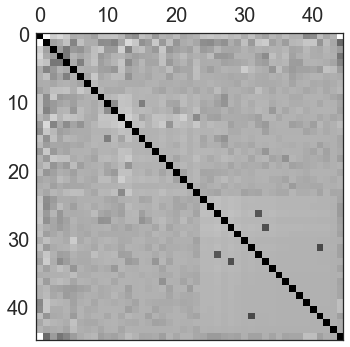

In [19]:
plt.matshow(X_tmp0.corr())

In [ ]:
# sns.pairplot(X_tmp)

In [20]:
X_tmp0 = X_tmp0.dropna()

In [383]:
X_tmp1 = X_tmp0
# X_tmp1 = X_tmp0[X_tmp0.openYR >=1996]

In [442]:
# # 'Family','sony',  ## leaving these out
X_tmp = X_tmp1.loc[:,[
#                         'mYrank', 
                        'openDTheatre', #'totalDTheatre',
                        'mv_runtime', 'DURrelease', #'logDURrelease',
                        'OscarNom',
#                         'openYR', 'openWK', 'openDay', 'openWkday',
                        #                        'PD_budget', 'totalDGross', 'W_gross'#,
                        #                        'logOpenDGross', 'logTotalDGross'#,
                        'Animation',
                        'Adventure', 
                        'Action', ##
                        'Comedy', 'Drama', 
                        'Documentary', 
#                         'Family', ##
                        'Fantasy', 'Foreign',
                        'Horror', 
                        'Period', 'Sci-Fi', 'Thriller',
                        'Western', 
                        'Romance',
                        'warnerbros', 
                        'universal', 'fox', 'buenavista',
#                         'sony', 
                        'paramount', 'miramax', 'newline', 'foxsearchlight',
                        'sonyclassics', 'lionsgate', 
                        'mgm', ##
                        'screengems', 'weinsteincompany',
                        'focus', 'magnolia', 'ifc', 'wb-newline', 'dreamworks', ##
                        #                        'D_RtnOInvest', 'W_RtnOInvest', 
                        #                         'logD_RtnOInvest', 
                        'logW_RtnOInvest'
                      ] ]


# 'Family',  ## leaving this dummy out
Xg_tmp = X_tmp1.loc[:,[
#                         'mYrank', 
                        'openDTheatre', #'totalDTheatre',
#                         'openYR', 'openWK', 'openDay', 'openWkday',
                        'mv_runtime', 'DURrelease', #'logDURrelease',
                        'OscarNom',
                        'Animation',
                        'Adventure', 
                        'Action', ##
                        'Comedy', 
                        'Drama', 
                        'Documentary', 
#                         'Family',
                        'Fantasy', 
                        'Foreign',
                        'Horror', 
                        'Period', 
                        'Sci-Fi', 
                        'Thriller',
                        'Western', 
                        'Romance',
#                         #'warnerbros', 
#                         'universal', 'fox', 'buenavista',
#                         'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
#                         'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
#                         'focus', 'magnolia', 'ifc', 'wb-newline', #'warnerbros',
#                         'dreamworks', ##
#                         #                        'D_RtnOInvest', 'W_RtnOInvest', 
#                         #                         'logD_RtnOInvest', 
                        'logW_RtnOInvest'
                      ] ]

# 'sony',  ## leaving this dummy out
Xs_tmp = X_tmp1.loc[:,[
#                         'mYrank', 
                        'openDTheatre', #'totalDTheatre',
#                         'openYR', 'openWK', 'openDay', 'openWkday',
                        'mv_runtime', 'DURrelease', #'logDURrelease',
                        'OscarNom',
#                         'Animation',
#                         'Adventure', 
#                         'Action', ##
#                         'Comedy', 'Drama', 
#                         'Documentary', 
#                         'Family',
#                         'Fantasy', 'Foreign',
#                         'Horror', 'Period', 'Sci-Fi', 'Thriller',
#                         'Western', 
#                         'Romance',
                        'warnerbros', 
                        'universal', 'fox', 'buenavista',
#                         'sony', 
                        'paramount', 'miramax', 'newline', 'foxsearchlight',
                        'sonyclassics', 'lionsgate', 
                        'mgm', ##
                        'screengems', 'weinsteincompany',
                        'focus', 'magnolia', 'ifc', 'wb-newline', 
                        'dreamworks', ##
                        #                        'D_RtnOInvest', 'W_RtnOInvest', 
                        #                         'logD_RtnOInvest', 
                        'logW_RtnOInvest'
                      ] ]

In [364]:
# X_tmp.columns
X_tmp.shape, Xg_tmp.shape, Xs_tmp.shape

((2375, 37), (2375, 19), (2375, 23))

In [25]:
# Xs_tmp

In [506]:
ahFilms = X_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms = X_tmp[(X_tmp.openDTheatre>250)].reset_index()

##genre
ahFilms_g = Xg_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms_g = Xg_tmp[(X_tmp.openDTheatre>250)].reset_index()

##studio
ahFilms_s = Xs_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms_s = Xs_tmp[(X_tmp.openDTheatre>250)].reset_index()

In [505]:
# ahFilms.iloc[[542,34,125,141,348,371,405],:]=np.nan
# ahFilms = ahFilms.dropna()

In [ ]:
# boFilms.iloc[674,:]=np.nan
# boFilms = boFilms.dropna()

In [ ]:
ahFilms.openDTheatre.plot.hist(20)

In [ ]:
boFilms.openDTheatre.plot.hist(20)

/Users/hrm/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


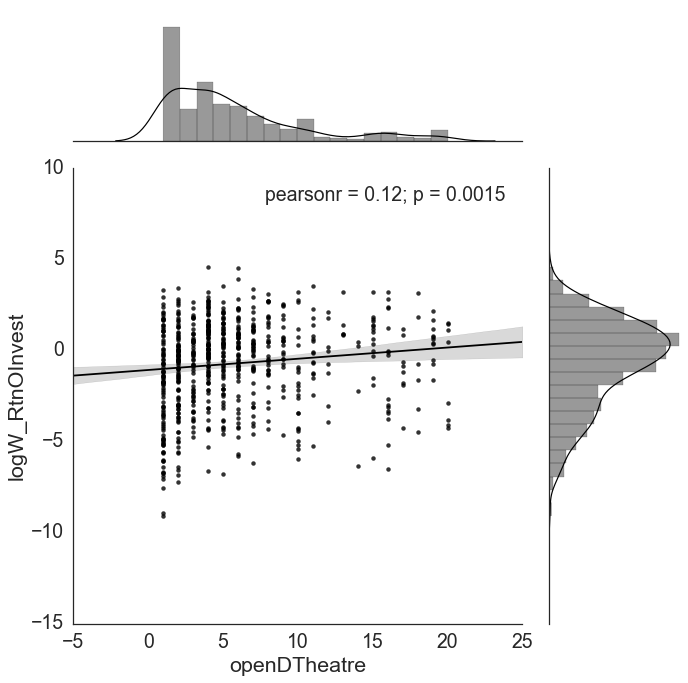

In [610]:
# sns.set_palette("Blues")
g = sns.jointplot("openDTheatre", "logW_RtnOInvest", data=ahFilms, size=10, ratio=3, color='k', kind="reg")#, stat_func=None)
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})

/Users/hrm/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


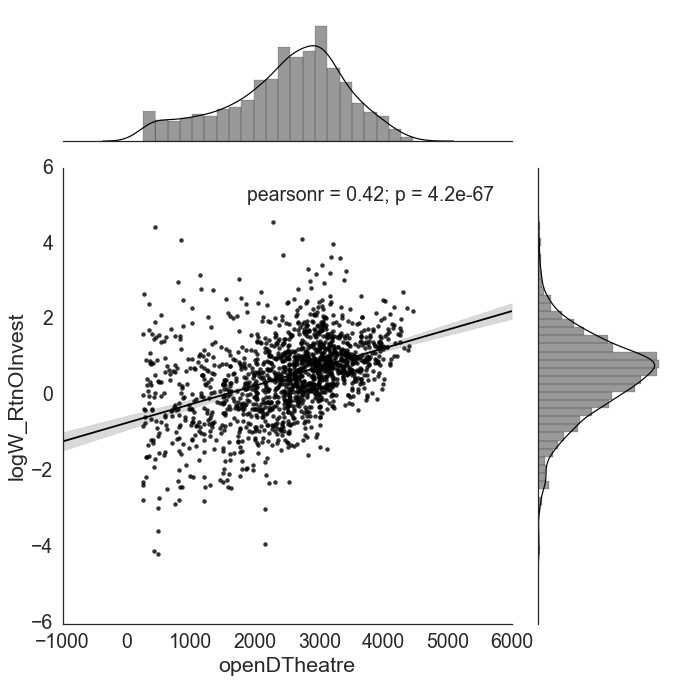

In [609]:
g = sns.jointplot("openDTheatre", "logW_RtnOInvest", data=boFilms, size=10,ratio=3, color='k', kind="reg")#, stat_func=None)
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})

In [ ]:
# import seaborn as sns; sns.set(style="white", color_codes=True)
# g = sns.jointplot("Action", "logW_RtnOInvest", data=boFilms, ratio=3, kind="reg")

In [366]:

X_tmp.shape, Xg_tmp.shape, Xs_tmp.shape
# X_tmp.columns
# ((2385, 42), (2385, 25), (2385, 28))

((2375, 37), (2375, 19), (2375, 23))

In [510]:
X = X_tmp.iloc[:,list(range(0,36))]

y = X_tmp.iloc[:,36].to_frame()

#########################
ahFilms_X = ahFilms.iloc[:,list(range(1,36))]
ahFilms_y = ahFilms.iloc[:,36].to_frame()

boFilms_X = boFilms.iloc[:,list(range(1,36))]
boFilms_y = boFilms.iloc[:,36].to_frame()

#########################
ahFilms_Xg = ahFilms_g.iloc[:,list(range(1,19))]
ahFilms_yg = ahFilms_g.iloc[:,19].to_frame()

boFilms_Xg = boFilms_g.iloc[:,list(range(1,19))]
boFilms_yg = boFilms_g.iloc[:,19].to_frame()

#########################
ahFilms_Xs = ahFilms_s.iloc[:,list(range(1,23))]
ahFilms_ys = ahFilms_s.iloc[:,23].to_frame()

boFilms_Xs = boFilms_s.iloc[:,list(range(1,23))]
boFilms_ys = boFilms_s.iloc[:,23].to_frame()

In [223]:
# y
# boFilms_y
# boFilms_yg
# boFilms_ys

In [224]:
# X
# boFilms_X
# boFilms_Xg
# boFilms_Xs
# ahFilms_Xg

In [285]:
from sklearn import cross_validation, datasets
from sklearn import linear_model,ensemble, tree, cross_validation
from sklearn import linear_model
from sklearn.cross_validation import KFold
from sklearn.cross_validation import ShuffleSplit
# from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn import cross_validation, datasets, grid_search, ensemble, tree, cluster, pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.grid_search import GridSearchCV

In [ ]:
boFilms_Xs

In [83]:
X.shape, y.shape
# poly_X
# poly.powers_
# scaled_X.shape

((2416, 36), (2416, 1))

In [ ]:
# scaled_X = StandardScaler().fit_transform(X)
# poly = PolynomialFeatures(2)
# poly.fit(scaled_X)
# poly.powers_ # this gives labels to the returned arrow indicating the transformation (aka ftr1**2, ftr1*ftr2 etc...)

# poly_X = poly.transform(scaled_X)

# x_train, x_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3)


# l1 = Lasso(max_iter=2500)
# l2 = Ridge(max_iter=2500)

# grid_params = {'alpha': np.logspace(-4,-0.1, 30)}

# grid = GridSearchCV(l2, param_grid= grid_params)
# grid.fit(x_train, y_train)

# l1_best = grid.best_estimator_
# l2_best = grid.best_estimator_

# l1_best.fit(x_train,y_train)
# l2_best.fit(x_train,y_train)

# print ('lasso:', l1_best.score(x_test, y_test) )
# print ('ridge:', l2_best.score(x_test,y_test) )

In [ ]:
# target_feature_names = ['X'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns,p) for p in poly.powers_]]

# output_df = pd.DataFrame(poly_X, columns = target_feature_names)

In [ ]:
# output_df = output_df.iloc[:,1:]
# output_df

In [ ]:
# poly = PolynomialFeatures(2)
# poly.fit(scaled_X)

# poly_X = poly.transform(scaled_X)

# x_train, x_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3)

# l1_best.fit(x_train,y_train)
# l2_best.fit(x_train,y_train)

# print ('lasso:', l1_best.score(x_test, y_test))
# print ('ridge:', l2_best.score(x_test,y_test) )

In [ ]:
# sorted(zip(output_df.columns, l1_best.coef_), key = lambda tup: np.abs(tup[1]), reverse=True)

In [ ]:
# top_ftrs = sorted(zip(output_df.columns, l1_best.coef_),key = lambda tup: np.abs(tup[1]), reverse=True)[:10]
# top_ftrs

In [ ]:
# sns.pairplot(pd.concat([output_df[[i[0] for i in top_ftrs]],y], axis = 1))
# plt.matshow(pd.concat([output_df[[i[0] for i in top_ftrs]],y], axis = 1).corr())

In [ ]:
output_df.shape , y.shape

In [639]:
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .1)
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(output_df,y,test_size = .1)

# X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_X,boFilms_y,test_size = .3)
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_X,ahFilms_y,test_size = .3)

# X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_Xg,boFilms_yg,test_size = .1)
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_Xs,boFilms_ys,test_size = .1)

# X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_Xg,ahFilms_yg,test_size = .1)
X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_Xs,ahFilms_ys,test_size = .1)



models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()

models['ridge_model'] = linear_model.Ridge()
parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model'] = linear_model.Lasso()
parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model_1'] = linear_model.Lasso(alpha=.01) # updated from bestmodel alpha selection

models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


for name,model in models.items():
    scores = cross_validation.cross_val_score(model, X_train, y_train, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Model: adaboostedTrees
Score: 0.34355478548

Model: randomForest
Score: 0.250805225148

Model: extratrees
Score: 0.285496079126

Model: cart
Score: 0.140039751567

Model: gradboostedTrees
Score: 0.36285443615

Model: lasso_model
Score: 0.199260443409

Model: lasso_model_1
Score: 0.307180482665

Model: ridge_model
Score: 0.304974577191

Model: linear_model
Score: 0.302876149239



/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [547]:
###
model = models['randomForest'].fit(X_train,y_train)

/Users/hrm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [548]:
model.feature_importances_  
## you have to zip the features... and print it out
sorted_features = sorted(zip(feature_names,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
for feature in sorted_features: 
    print(feature)
        
print("")

('openDTheatre', 0.40743470842428192)
('DURrelease', 0.25406279109702562)
('mv_runtime', 0.16697135434136673)
('Horror', 0.037921921194328023)
('Drama', 0.020516538036219036)
('Comedy', 0.018246344497417983)
('Action', 0.016186828755140756)
('OscarNom', 0.013367964836259853)
('Sci-Fi', 0.013083329057974036)
('Romance', 0.012651048810878755)
('Thriller', 0.010233130649019396)
('Documentary', 0.0075308677273941901)
('Animation', 0.0060729134689283485)
('Adventure', 0.0054861814597787712)
('Period', 0.0040763474858151573)
('Western', 0.0034122599256258346)
('Fantasy', 0.0021720661596416201)
('Foreign', 0.00057340407290387186)



In [549]:
###
model.score(X_test,y_test)

0.18898613471926717

In [ ]:
## Tree interpreter??
## feature selection?? select from model || RV
# from sklearn import feature_selection
# transforms data -- model

In [640]:
# kfold = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)
kfold = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)
lasso = Lasso()
ridge = Ridge()

parameters = {'normalize':(True,False), #(True,False),
              'alpha': np.logspace(-10,2,100)}
grid_searcher = grid_search.GridSearchCV(lasso, parameters, cv=kfold)
# grid_searcher = grid_search.GridSearchCV(ridge, parameters, cv=kfold)
grid_searcher.fit(X_train, y_train)
grid_searcher.best_params_

# {'alpha': 0.00035111917342151347, 'normalize': True}

#boFilms Xg
# lasso {'alpha': 0.00011497569953977356, 'normalize': True} | 
# 'alpha': 2.1544346900318867e-05, 'normalize': True}
# {'alpha': 0.00081113083078968723, 'normalize': False}
# {'alpha': 4.977023564332114e-05, 'normalize': True}
# {'alpha': 1.3219411484660286e-10, 'normalize': True}
#boFilms Xs
# {'alpha': 6.5793322465756827e-05, 'normalize': True}
# {'alpha': 0.00011497569953977356, 'normalize': True}
# {'alpha': 1e-10, 'normalize': True}

#ahFilms 
# lasso {'alpha': 0.040370172585965494, 'normalize': False} | 
# {'alpha': 0.013219411484660288, 'normalize': False}
# {'alpha': 0.023101297000831581, 'normalize': False}
#ahFilms ridge {'alpha': 100.0, 'normalize': False}

{'alpha': 0.0043287612810830618, 'normalize': False}

In [641]:
best_model = grid_searcher.best_estimator_

In [642]:
best_model.coef_

array([ 0.05644664, -0.0018258 ,  0.01179574,  1.5067983 ,  0.3211256 ,
        0.        , -0.        ,  0.03437558,  0.29419653,  1.09166645,
        0.        ,  1.26942036,  0.28565006,  0.54922496,  0.        ,
        0.73470964,  1.38198708,  0.75113173,  0.046172  ,  0.34954546,
        0.        , -0.        ])

In [643]:
best_model.score(X_test,y_test)

0.3390780611825005

In [644]:
best_model

Lasso(alpha=0.0043287612810830618, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# X_train

In [646]:
feature_names=X_train.columns

In [647]:
models = {}
# models['lasso_model_1'] = linear_model.Lasso(alpha=0.0002009233002565046) # updated from bestmodel alpha selection

##boFilms Xg
# models['lasso_model_1'] = linear_model.Lasso(alpha=0.00011497569953977356) # updated from bestmodel alpha selection
# models['lasso_model_1'] = linear_model.Lasso(alpha= 2.1544346900318867e-05) # updated from bestmodel alpha selection
# models['lasso_model_1'] = linear_model.Lasso(alpha= 0.0014174741629268048)
# models['lasso_model_1'] = linear_model.Lasso(alpha=0.0002009233002565046)
# models['ridge'] = linear_model.Ridge(alpha=1)

##ahFilms
# models['lasso_model_0'] = linear_model.Lasso(alpha=1.6297508346206434e-05)
# models['lasso_model_1'] = linear_model.Lasso(alpha=0.0075646332755462909) # updated from bestmodel alpha selection

models['lasso_model_0'] = linear_model.Lasso(alpha=0.0043287612810830618)
# models['lasso'] = linear_model.Lasso(alpha=0.0032745491628777316) # updated from bestmodel alpha selection


In [648]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         X, y, test_size=0.3, random_state=223)

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         output_df, y, test_size=0.3, random_state=223)

    
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         ahFilms_X, ahFilms_y, test_size=0.3, random_state=223)

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         boFilms_X, boFilms_y, test_size=0.3, random_state=223)



# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         boFilms_Xg, boFilms_yg, test_size=0.3, random_state=223)

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         boFilms_Xs, boFilms_ys, test_size=0.3, random_state=223)

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         ahFilms_Xg, ahFilms_yg, test_size=0.3, random_state=223)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        ahFilms_Xs, ahFilms_ys, test_size=0.3, random_state=223)


for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_train,y_train)))
    sorted_features = sorted(zip(feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lasso_model_0
Score: 0.342382024547
('OscarNom', 1.583660138491356)
('weinsteincompany', 1.3608500881212473)
('foxsearchlight', 1.2989133273601841)
('miramax', 1.1896543036894811)
('screengems', 1.016556476259316)
('lionsgate', 1.015226904923838)
('focus', 0.91005565936459398)
('warnerbros', 0.56311844851534543)
('ifc', 0.5364911169874258)
('buenavista', 0.49683275305567992)
('universal', 0.35327093201088433)
('sonyclassics', 0.31874780694084537)
('magnolia', 0.22213221784373072)
('paramount', 0.20087404573772344)
('openDTheatre', 0.044263027501910808)
('DURrelease', 0.011871546712430493)
('mv_runtime', -0.0023181499551788547)
('fox', -0.0)
('newline', 0.0)
('mgm', -0.0)
('wb-newline', 0.0)
('dreamworks', 0.0)



In [ ]:
# sorted_features[:25]
# ahFilms_Xg
# ahFilms_X2

In [649]:
ahFilms_X2 = ahFilms_Xs.drop(['mgm','dreamworks'],axis=1)
                              
# Model: lasso_model_0
# Score: 0.34638748437
# ('foxsearchlight', 1.9139166073826799)
# ('screengems', 1.6789071638642954)
# ('OscarNom', 1.5782747898533382)
# ('weinsteincompany', 1.4988968737457888)
# ('miramax', 1.3103088011967388)
# ('lionsgate', 1.2169229670683628)
# ('focus', 1.0777443003288429)
# ('warnerbros', 0.72763741657987357)
# ('buenavista', 0.71880846128335141)
# ('ifc', 0.6365956959407858)
# ('universal', 0.603210558807592)
# ('fox', -0.51763091674616524)
# ('sonyclassics', 0.41317698569092864)
# ('paramount', 0.32513254542320325)
# ('magnolia', 0.31320260235476438)
# ('newline', 0.11430712003593727)
# ('wb-newline', 0.084477603770355611)
# ('openDTheatre', 0.042156929062545846)
# ('DURrelease', 0.011797414452577086)
# ('mv_runtime', -0.0029055913266445564)
# ('mgm', -0.0)
# ('dreamworks', 0.0)

# Model: lasso_model_0
# Score: 0.342382024547
# ('OscarNom', 1.583660138491356)
# ('weinsteincompany', 1.3608500881212473)
# ('foxsearchlight', 1.2989133273601841)
# ('miramax', 1.1896543036894811)
# ('screengems', 1.016556476259316)
# ('lionsgate', 1.015226904923838)
# ('focus', 0.91005565936459398)
# ('warnerbros', 0.56311844851534543)
# ('ifc', 0.5364911169874258)
# ('buenavista', 0.49683275305567992)
# ('universal', 0.35327093201088433)
# ('sonyclassics', 0.31874780694084537)
# ('magnolia', 0.22213221784373072)
# ('paramount', 0.20087404573772344)
# ('openDTheatre', 0.044263027501910808)
# ('DURrelease', 0.011871546712430493)
# ('mv_runtime', -0.0023181499551788547)
# ('fox', -0.0)
# ('newline', 0.0)
# ('mgm', -0.0)
# ('wb-newline', 0.0)
# ('dreamworks', 0.0)

# In [ ]:





# ahFilms_X2 = ahFilms_Xg.drop(['Action','Animation','Adventure'],axis=1)

# ,'Documentary', 'Fantasy', 'Sci-Fi',
#                              'Thriller','Western','Romance'
# Model: lasso_model_0
# Score: 0.324801146927
# ('OscarNom', 1.6079288124307765)
# ('Comedy', 0.6440325825912937)
# ('Foreign', 0.5708683881646609)
# ('Period', -0.46487896714692584)
# ('Horror', -0.4489435899202841)
# ('Drama', 0.40264571670732147)
# ('openDTheatre', 0.050911132898866479)
# ('DURrelease', 0.012334326363043564)
# ('mv_runtime', -0.00077519197527354123)
# ('Animation', 0.0)
# ('Adventure', -0.0)
# ('Action', 0.0)
# ('Documentary', 0.0)
# ('Fantasy', -0.0)
# ('Sci-Fi', 0.0)
# ('Thriller', 0.0)
# ('Western', 0.0)
# ('Romance', 0.0)



# Model: lasso_model_0
# Score: 0.332474794673
# ('OscarNom', 1.6880179594897238)
# ('Fantasy', 0.94139489527298448)
# ('Foreign', -0.86555855105291735)
# ('Comedy', 0.80915149910704287)
# ('Period', -0.78115351128663313)
# ('Family', -0.58180473099976571)
# ('Drama', 0.53004109659835585)
# ('Documentary', 0.14041990423311282)
# ('Western', 0.071900474710860779)
# ('openDTheatre', 0.05125702033710023)
# ('Romance', 0.035894532617683987)
# ('Thriller', 0.034874295117646323)
# ('DURrelease', 0.012063504720993106)
# ('mv_runtime', -0.0016562194571484268)
# ('Animation', 0.0)
# ('Adventure', -0.0)
# ('Action', 0.0)
# ('Sci-Fi', 0.0)


# Model: lasso_model_0
# Score: 0.333664203438
# ('OscarNom', 1.6955380520023418)
# ('Fantasy', 1.0222852253108985)
# ('Foreign', -0.90166954724605819)
# ('Comedy', 0.85692360824774239)
# ('Period', -0.81567676586042914)
# ('Family', -0.80627523961519665)
# ('Drama', 0.57798341573465717)
# ('Western', 0.25712890299461788)
# ('Documentary', 0.22271148412496169)
# ('Romance', 0.10201995075142421)
# ('Thriller', 0.083505331232232735)
# ('Animation', 0.067158076809671258)
# ('Action', 0.055079637127489006)
# ('openDTheatre', 0.051359002972790488)
# ('DURrelease', 0.012019453829598917)
# ('mv_runtime', -0.0017966613768854943)
# ('Adventure', -0.0)
# ('Sci-Fi', 0.0)



# Model: lasso_model_0
# Score: 0.342778079672
# ('Fantasy^1', 1.8418550094359432)
# ('Animation^1', 1.7314581654993131)
# ('Period^1', 1.0401707350365383)
# ('Foreign^1', -0.894157882082663)
# ('Drama^1', 0.68278565507022526)
# ('Sci-Fi^1', -0.63349750550878814)
# ('Documentary^1', 0.54351668539658993)
# ('Romance^1', 0.39657996959545505)
# ('Thriller^1', 0.38848173379815376)
# ('warnerbros^1', 0.38838107345828787)
# ('Comedy^1', 0.31867373882893812)
# ('Adventure^1', 0.099282915074236172)
# ('Family^1', 0.093845813975497697)
# ('mv_runtime^1', 0.067215631370010673)
# ('OscarNom^1', 0.012479785167248708)
# ('DURrelease^1', -0.0047524282280023622)
# ('Action^1', -0.0)
# ('Western^1', -0.0)

# ahFilms_X2 = ahFilms_X.loc[:,['openYR', 'openDay', 
#                               'mYrank', 'openDTheatre', 'openWK', 'DURrelease', 'mv_runtime', 
#                              'OscarNom', 'Drama', 'Comedy', 'Romance','Foreign', 'Adventure', 'Documentary', 
#                               'Thriller', 'Period', 
#                               'weinsteincompany', 'ifc', 'magnolia','foxsearchlight', 'sony', 'miramax', 'universal'
#                                 ]]

# Model: lasso_model_0
# Score: 0.609636476915
# ahFilms_X2 = ahFilms_X.loc[:,['Period', 'Adventure', 'Fantasy', 'Animation', 'Romance', 'Drama', 
#                                 'Comedy', 'Thriller', 'Family', 'Horror', 'Sci-Fi', 
#                                 'magnolia', 'weinsteincompany', 'buenavista', 'universal', 'mgm', 'newline', 
#                                 'dreamworks','sonyclassics', 'miramax', 'focus', 'sony', 'foxsearchlight', 
#                                 'fox', 'ifc', 'screengems', 'wb-newline','lions_gate', 'paramount', 'lionsgate', 
#                                 'OscarNom',
#                                 'mv_runtime', 'DURrelease', 
#                                 'openDTheatre', 
#                                 'openWK', 'openWkday','openYR', 'openDay', 
#                                 'mYrank', ]] 

# # Model: lasso_model_0
# Score: 0.584864680754
# ('OscarNom', 0.29202266268313593)
# ('openYR', 0.031078651599522694)
# ('mv_runtime', -0.01888455559922806)
# ('openDay', -0.014138824387559805)
# ('openDTheatre', -0.01250774369368288)
# ('mYrank', -0.012121804322258513)
# ('openWK', -0.0078085362868152959)
# ('DURrelease', 0.0020743555565734531)

# ahFilms_X2 = ahFilms_X.loc[:,['Period', 'Romance', 'Drama',
#                               'foxsearchlight', 
#                                 'fox', 'ifc', 
#                                 'OscarNom',
#                                 'mv_runtime', 
#                                 'mYrank', ]] 



# Model: lasso_model_0
# Score: 0.580796557436
# ('OscarNom', 0.53915519688395086)
# ('fox', -0.17406638746447356)
# ('weinsteincompany', 0.1002603612649336)
# ('lions_gate', 0.094161806909169463)
# ('warnerbros', 0.042238563804961951)
# ('openYR', 0.039603797643576334)
# ('sony', 0.026914532505951053)
# ('mv_runtime', -0.022165404506669671)
# ('openWkday', 0.017553205588915984)
# ('mYrank', -0.011604216227704418)
# ('openWK', -0.010044884699266317)
# ('openDay', -0.0082662329864951322)
# ('DURrelease', 0.0021971839834994881)
# ('openDTheatre', 0.0)
# ('Animation', -0.0)
# ('Action', 0.0)
# ('Comedy', 0.0)
# ('Drama', 0.0)
# ('Horror', -0.0)
# ('Sci-Fi', -0.0)
# ('Thriller', -0.0)
# ('Romance', 0.0)
# ('universal', 0.0)
# ('buenavista', 0.0)
# ('paramount', 0.0)
# ('miramax', -0.0)
# ('newline', 0.0)
# ('foxsearchlight', -0.0)
# ('sonyclassics', 0.0)
# ('lionsgate', -0.0)
# ('mgm', 0.0)
# ('screengems', -0.0)
# ('focus', 0.0)
# ('magnolia', 0.0)
# ('ifc', -0.0)
# ('wb-newline', 0.0)



In [654]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         ahFilms_X2, ahFilms_yg, test_size=0.3, random_state=223)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        ahFilms_X2, ahFilms_ys, test_size=0.3, random_state=223)


X_train = sm.add_constant(X_train, has_constant='add')

model = sm.OLS(y_train, X_train) #, hasconst=False)
olsres = model.fit()

# olsres.resid

olsres.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     12.63
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           6.72e-33
Time:                        09:20:17   Log-Likelihood:                -1020.1
No. Observations:                 495   AIC:                             2082.
Df Residuals:                     474   BIC:                             2170.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -2.6453      0.621     -4.260      0.000        -3.865    -1.425
openDTheatre         0.0397      0.021      1.934      0.054        -0.001     0.080
mv_runtime          -0.0034      0.006     -0.597      0.551        -0.015     0.008
DURrelease           0.0117      0.001      8.135      0.000         0.009     0.015
OscarNom             1.5787      0.240      6.568      0.000         1.106     2.051
warnerbros           0.8588      0.546      1.573      0.116        -0.214     1.932
universal            0.7974      0.759      1.051      0.294        -0.693     2.288
fox                 -0.9390      0.983     -0.955      0.340        -2.871     0.993
buenavista           0.8906      0.705      1.263      0.207        -0.495     2.276
paramount            0.4229      0.442      0.956      0.339        -0.446     1.292
miramax              1.4066      0.455      3.089      0.002         0.512     2.301
newline              0.1878      1.144      0.164      0.870        -2.059     2.435
foxsearchlight       2.4133      1.027      2.349      0.019         0.394     4.432
sonyclassics         0.4898      0.321      1.525      0.128        -0.141     1.121
lionsgate            1.3754      0.664      2.072      0.039         0.071     2.680
screengems           2.1829      1.383      1.578      0.115        -0.535     4.901
weinsteincompany     1.6061      0.497      3.234      0.001         0.630     2.582
focus                1.2104      0.563      2.151      0.032         0.105     2.316
magnolia             0.3860      0.359      1.075      0.283        -0.320     1.092
ifc                  0.7150      0.401      1.784      0.075        -0.073     1.503
wb-newline           1.0129      2.248      0.451      0.653        -3.405     5.430
==============================================================================
Omnibus:                        6.573   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.590
Skew:                          -0.230   Prob(JB):                       0.0371
Kurtosis:                       3.328   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [655]:
X_test = sm.add_constant(X_test, has_constant='add')

In [657]:
ypred = pd.DataFrame(olsres.predict(X_test))
# print(ypred)
# ypred.shape, y_test.shape, olsres.resid.shape

In [ ]:
# joinYs = pd.concat([ypred,y_test],axis=1)
# joinYs.columns = ['ypred','y_test']
# # joinYs1 = joinYs.dropna()
# joinYs1.shape

In [651]:
# import seaborn as sns; sns.set(style="white", color_codes=True)
# g = sns.jointplot("ypred", "y_test", data=joinYs1, size = 5, ratio=3) #, kind="reg")

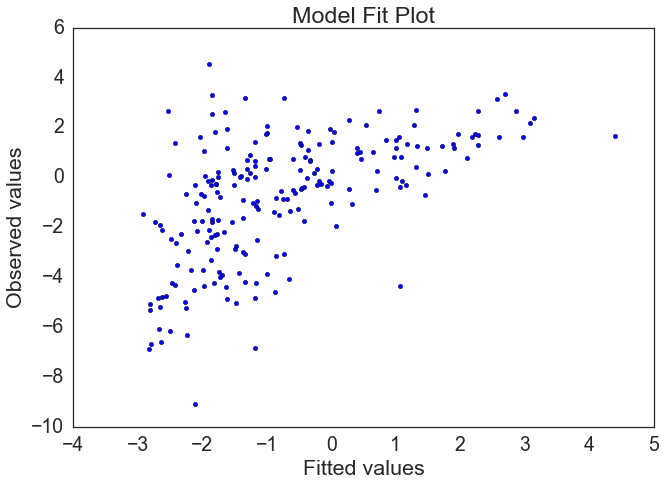

In [658]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(ypred, y_test)
# line_fit = sm.OLS(ypred, sm.add_constant(y_test, prepend=True), missing='drop', hasconst=True).fit()
# line_fit = sm.OLS(joinYs1.iloc[:,0], sm.add_constant(joinYs1.iloc[:,1], prepend=True), missing='drop', hasconst=True).fit()
# abline_plot(model_results=line_fit, ax=ax)

# ypred.shape

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

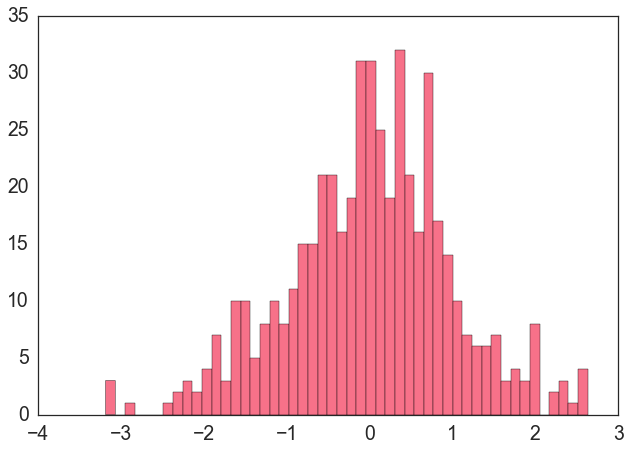

In [527]:
from scipy import stats
plt.hist(stats.zscore(olsres.resid), bins=50);

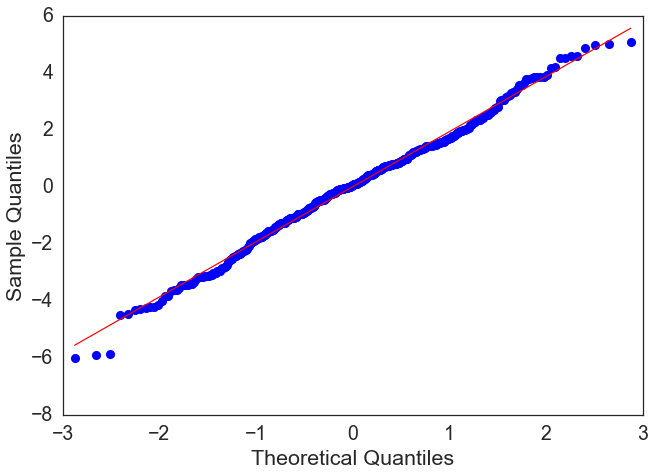

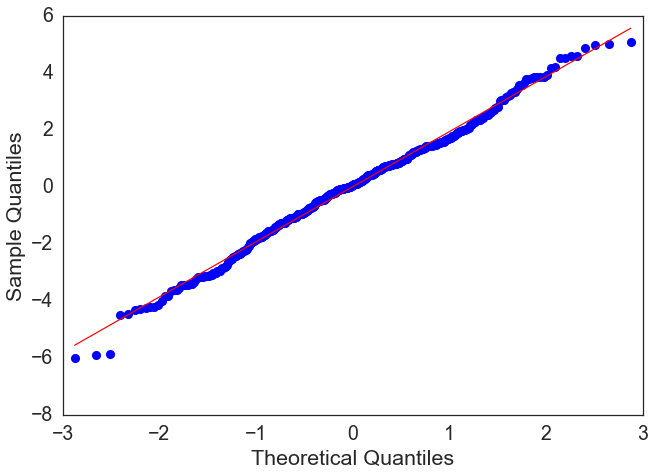

In [633]:
from statsmodels import graphics
graphics.gofplots.qqplot(olsres.resid, line='r')

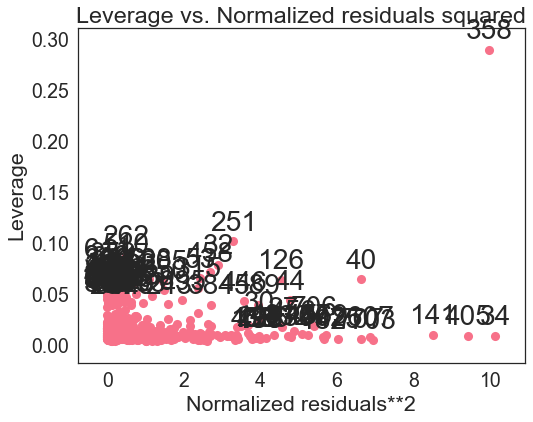

In [529]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(olsres, ax = ax)

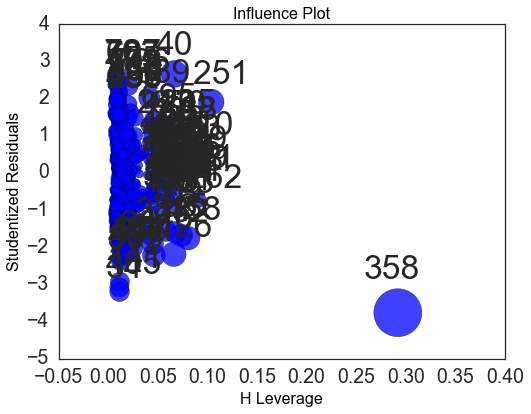

In [530]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(olsres, ax=ax)


In [94]:
# boFilms_Xg.columns
boFilms_X2.columns
# boFilms_X.columns


Index(['openDTheatre', 'mv_runtime', 'DURrelease', 'OscarNom', 'Animation',
       'Adventure', 'Action', 'Comedy', 'Drama', 'Documentary', 'Family',
       'Fantasy', 'Period', 'Sci-Fi', 'Thriller', 'Western', 'Romance'],
      dtype='object')

In [543]:
boFilms_X2 = boFilms_Xg

# Model: lasso_model_1
# Score: 0.303699711993
# ('Documentary', 1.6322175615446681)
# ('Western', -0.86425083013327053)
# ('Animation', -0.54228182133906044)
# ('Foreign', 0.44843973773545837)
# ('Horror', 0.42485938425395914)
# ('Sci-Fi', -0.36943440490842072)
# ('Adventure', -0.31930866990880002)
# ('Period', -0.3131557852173133)
# ('OscarNom', 0.30597552506021242)
# ('Fantasy', -0.19336038371375178)
# ('Romance', 0.13471645010704805)
# ('Comedy', -0.12666024699782671)
# ('Action', -0.12332753219703034)
# ('Thriller', 0.03235009100324631)
# ('Drama', 0.024544757170827457)
# ('DURrelease', 0.0095974098762040463)
# ('mv_runtime', -0.0027601884391043894)
# ('openDTheatre', 0.00041143978432528478)

# boFilms_X2 = boFilms_Xg.drop(['Foreign','Thriller'],axis=1)

# Model: lasso_model_1
# Score: 0.303047559269
# ('Documentary', 1.4207916089881003)
# ('Western', -0.60038438585146237)
# ('Animation', -0.52112485171903788)
# ('Family', -0.39116866778994014)
# ('Period', 0.38870369026602331)
# ('OscarNom', 0.25982473017451674)
# ('Sci-Fi', -0.24499285906915685)
# ('Fantasy', -0.17920916119362854)
# ('Adventure', -0.17892998656487505)
# ('Action', -0.16358344014952278)
# ('Romance', 0.093708312013069742)
# ('Comedy', -0.087426819612316825)
# ('Drama', 0.032653071146674963)
# ('DURrelease', 0.0097484868743425521)
# ('mv_runtime', -0.0037871911610787012)
# ('openDTheatre', 0.00040837162105800731)
# ('Foreign', 0.0)
# ('Thriller', 0.0)


# boFilms_X2 = boFilms_Xg.drop(['Fantasy'],axis=1)

# Model: lasso_model_1
# Score: 0.285565957952
# ('Documentary', 0.80541486135430296)
# ('Western', -0.5694255559685989)
# ('Foreign', 0.49654870443168386)
# ('Animation', -0.31260319724974028)
# ('OscarNom', 0.28224540708339163)
# ('Sci-Fi', -0.28115880639336804)
# ('Adventure', -0.24263648110491012)
# ('Period', -0.14206504230282929)
# ('Thriller', 0.091454534248582603)
# ('Family', -0.06308176365278173)
# ('Action', -0.058528548711722757)
# ('Comedy', -0.057399142995138007)
# ('Romance', 0.055770197519108056)
# ('Drama', 0.030600389474262593)
# ('DURrelease', 0.0085329188000940245)
# ('mv_runtime', -0.0023692709128601865)
# ('openDTheatre', 0.0004028285488320945)
# ('Fantasy', 0.0)


# Model: lasso_model_1
# Score: 0.302720089137
# ('Documentary', 1.4809244332569385)
# ('Western', -0.66507192595184805)
# ('Animation', -0.50036680048811177)
# ('Foreign', 0.42784477476262522)
# ('Sci-Fi', -0.3465960323737694)
# ('Adventure', -0.29623674591307841)
# ('OscarNom', 0.28815848868573996)
# ('Period', -0.26300724577330797)
# ('Family', -0.15229893977540648)
# ('Romance', 0.12450244241481616)
# ('Comedy', -0.11318636103955167)
# ('Action', -0.1130419679093195)
# ('Thriller', 0.032171740116736222)
# ('Drama', 0.022722709704115267)
# ('DURrelease', 0.0095302782086665715)
# ('mv_runtime', -0.0025710455167831923)
# ('openDTheatre', 0.00040640653673158799)
# ('Fantasy', 0.0)

# boFilms_X.drop(['Fantasy','Adventure','Documentary','foxsearchlight','magnolia','ifc','wb-newline'],axis=1)

# Model: lasso_model_1
# Score: 0.0520534352386
# ('buenavista', -0.043909887340302135)
# ('lionsgate', -0.04236088168489846)
# ('focus', -0.042230992555342343)
# ('universal', -0.041692052236304782)
# ('paramount', -0.041075702825907646)
# ('fox', -0.0403647244612357)
# ('warnerbros', -0.040279066630839772)
# ('miramax', -0.039888697005794012)
# ('sony', -0.039418561018209328)
# ('sonyclassics', -0.035980222678351506)
# ('screengems', -0.035283615463488759)
# ('weinsteincompany', -0.034401338797008206)
# ('OscarNom', 0.034394134384608532)
# ('Romance', 0.027910410449277785)
# ('Animation', 0.015420119716466783)
# ('Comedy', 0.012790969438527384)
# ('Thriller', 0.0084992603372270863)
# ('Drama', -0.0073580578450133573)
# ('Sci-Fi', -0.0069413169988353264)
# ('Period', -0.0064023051502076107)
# ('Action', -0.0058452657595917772)
# ('newline', -0.0058132467837273948)
# ('Family', -0.0048596329039218263)
# ('Western', -0.0042360092724086154)
# ('Foreign', 0.00037732070156404622)
# ('mv_runtime', 0.00013446332066425264)
# ('DURrelease', -1.2312239406157288e-05)
# ('openDTheatre', -3.2602481074060895e-06)
# ('Adventure', 0.0)
# ('Documentary', -0.0)
# ('Fantasy', 0.0)
# ('foxsearchlight', 0.0)
# ('magnolia', 0.0)
# ('ifc', 0.0)
# ('wb-newline', -0.0)


# Model: lasso_model_1
# Score: 0.323564937218
# ('Documentary', 1.4186807372554888)
# ('Western', -0.87490260012656018)
# ('Animation', -0.54857821731067491)
# ('Family', -0.51595885543169362)
# ('Fantasy', -0.50125215990841931)
# ('OscarNom', 0.39460078320045211)
# ('Foreign', 0.3692230604135916)
# ('Action', -0.34540599204200545)
# ('Sci-Fi', -0.33308618703502213)
# ('Adventure', -0.30122304974126646)
# ('Comedy', -0.24194832275047862)
# ('Period', -0.15220468146391775)
# ('Thriller', -0.049887252646671432)
# ('Romance', -0.046507149475827951)
# ('Drama', -0.040828656270463601)
# ('DURrelease', 0.0083176046118534942)
# ('mv_runtime', -0.0039243534401647417)
# ('openDTheatre', 0.00050526178064531902)

# Model: lasso_model_1
# Score: 0.317402799439
# ('Western', -0.70075114990529508)
# ('Animation', -0.47967655395024827)
# ('Documentary', -0.47848858739891142)
# ('Family', -0.43512177184898737)
# ('OscarNom', 0.38555306245131954)
# ('Foreign', 0.38310741607503079)
# ('Action', -0.31592991344615834)
# ('Sci-Fi', -0.29467902704511828)
# ('Adventure', -0.26879480978123893)
# ('Comedy', -0.22031168494208714)
# ('Period', -0.079096384090066904)
# ('Romance', -0.01981236683180505)
# ('Thriller', -0.01869642366998724)
# ('Drama', -0.017447963274736307)
# ('DURrelease', 0.0082404703434457351)
# ('mv_runtime', -0.0038494006374664631)
# ('openDTheatre', 0.00049147914339649386)
# ('Fantasy', 0.0)

# Model: lasso_model_1
# Score: 0.314947224837
# ('Documentary', 1.2345880291860671)
# ('Western', -1.0336081251399032)
# ('Animation', -0.76974519784890982)
# ('Fantasy', -0.63804146626517211)
# ('Family', -0.62471790093340418)
# ('Action', -0.45549429642905992)
# ('Adventure', -0.40449991424758441)
# ('OscarNom', 0.39428310974431019)
# ('Comedy', -0.3843161921083022)
# ('Sci-Fi', -0.3797154785939465)
# ('Thriller', -0.18548615997356974)
# ('Drama', -0.18085390779158797)
# ('Period', -0.17925756452274408)
# ('Romance', -0.12179008320569314)
# ('DURrelease', 0.0082213418256352928)
# ('mv_runtime', -0.0054024638561532869)
# ('openDTheatre', 0.0005155184422318093)
# ('Foreign', 0.0)




In [544]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         boFilms_X2, boFilms_y, test_size=0.3, random_state=223)  #-intuitive expl-


# X_train, X_test, y_train, y_test = cross_validation.train_test_split(
#                                         boFilms_X2, boFilms_y2, test_size=0.3, random_state=223)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        boFilms_X2, boFilms_yg, test_size=0.3, random_state=223)



X_train = sm.add_constant(X_train, has_constant='add')

model = sm.OLS(y_train, X_train) #, hasconst=False)
olsres = model.fit()

# olsres.resid

olsres.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     25.60
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.14e-70
Time:                        06:27:44   Log-Likelihood:                -1396.4
No. Observations:                1075   AIC:                             2831.
Df Residuals:                    1056   BIC:                             2925.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.9916      0.247     -4.014      0.000        -1.476    -0.507
openDTheatre     0.0004   3.62e-05     11.396      0.000         0.000     0.000
mv_runtime      -0.0028      0.002     -1.286      0.199        -0.007     0.001
DURrelease       0.0096      0.001      9.477      0.000         0.008     0.012
OscarNom         0.3098      0.115      2.700      0.007         0.085     0.535
Animation       -0.5519      0.159     -3.467      0.001        -0.864    -0.240
Adventure       -0.3246      0.137     -2.372      0.018        -0.593    -0.056
Action          -0.1256      0.089     -1.417      0.157        -0.299     0.048
Comedy          -0.1295      0.083     -1.567      0.117        -0.292     0.033
Drama            0.0252      0.095      0.265      0.791        -0.161     0.211
Documentary      1.6676      0.378      4.411      0.000         0.926     2.409
Fantasy         -0.2028      0.168     -1.209      0.227        -0.532     0.126
Foreign          0.6654      0.900      0.739      0.460        -1.101     2.432
Horror           0.4236      0.102      4.155      0.000         0.224     0.624
Period          -0.3245      0.212     -1.527      0.127        -0.741     0.092
Sci-Fi          -0.3745      0.126     -2.974      0.003        -0.622    -0.127
Thriller         0.0327      0.100      0.326      0.744        -0.164     0.229
Western         -0.9099      0.407     -2.235      0.026        -1.709    -0.111
Romance          0.1371      0.106      1.290      0.197        -0.071     0.346
==============================================================================
Omnibus:                       53.064   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.679
Skew:                           0.333   Prob(JB):                     3.06e-23
Kurtosis:                       4.368   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [377]:
X_test = sm.add_constant(X_test, has_constant='add')

ypred = pd.DataFrame(olsres.predict(X_test))
# print(ypred)
# ypred.shape, y_test.shape, olsres.resid.shape


In [ ]:

# joinYs = pd.concat([ypred,y_test],axis=1)
# joinYs.columns = ['ypred','y_test']
# # joinYs1 = joinYs.dropna()

# import seaborn as sns; sns.set(style="white", color_codes=True)
# g = sns.jointplot("ypred", "y_test", data=joinYs1, size = 5, ratio=3) #, kind="reg")


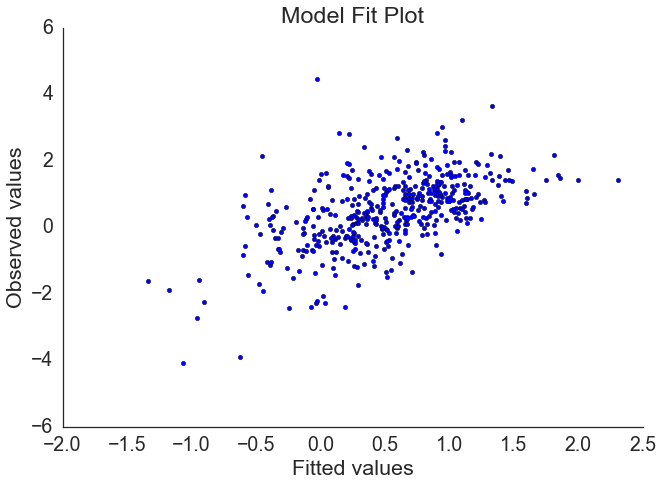

In [378]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(ypred, y_test)
# line_fit = sm.OLS(ypred, sm.add_constant(y_test, prepend=True), missing='drop', hasconst=True).fit()
# line_fit = sm.OLS(joinYs1.iloc[:,0], sm.add_constant(joinYs1.iloc[:,1], prepend=True), missing='drop', hasconst=True).fit()
# abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   4.,   4.,   7.,   7.,
          7.,  14.,  18.,  16.,  21.,  35.,  41.,  69.,  63.,  80.,  72.,
         81.,  79.,  81.,  63.,  58.,  46.,  35.,  33.,  25.,  19.,  17.,
          9.,  12.,  10.,   7.,   6.,   4.,   3.,   3.,   0.,   0.,   4.,
          0.,   1.,   0.,   0.,   1.,   1.]),
 array([-3.75648918, -3.59369274, -3.43089629, -3.26809985, -3.1053034 ,
        -2.94250695, -2.77971051, -2.61691406, -2.45411761, -2.29132117,
        -2.12852472, -1.96572828, -1.80293183, -1.64013538, -1.47733894,
        -1.31454249, -1.15174605, -0.9889496 , -0.82615315, -0.66335671,
        -0.50056026, -0.33776381, -0.17496737, -0.01217092,  0.15062552,
         0.31342197,  0.47621842,  0.63901486,  0.80181131,  0.96460775,
         1.1274042 ,  1.29020065,  1.45299709,  1.61579354,  1.77858999,
         1.94138643,  2.10418288,  2.26697932,  2.42977577,  2.59257222,
         2.75536866,  2.91816511,  3.08096155,  3.243758  ,  3.40655445,
 

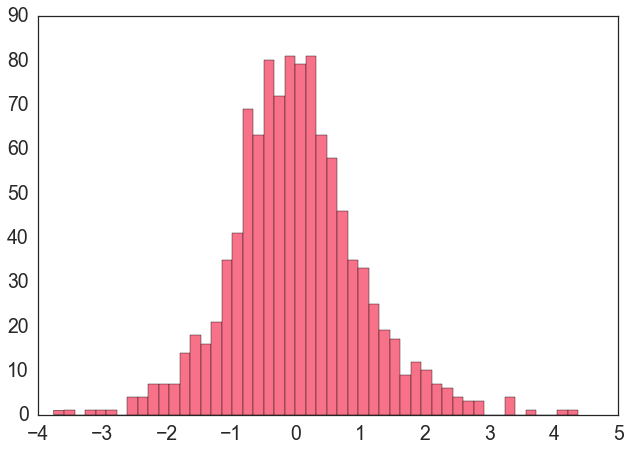

In [379]:
from scipy import stats
plt.hist(stats.zscore(olsres.resid), bins=50);
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
# sns.despine()

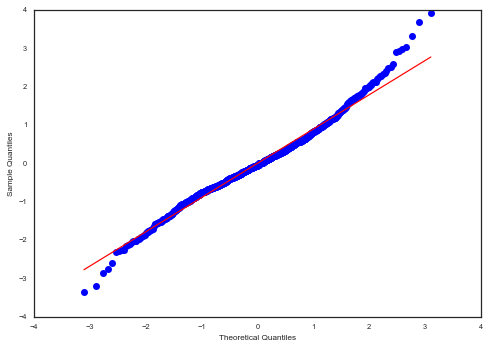

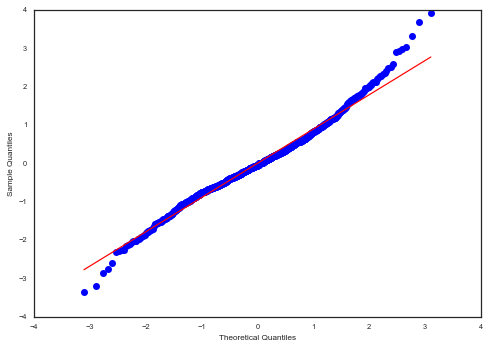

In [382]:
from statsmodels import graphics
graphics.gofplots.qqplot(olsres.resid, line='r')
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
# sns.despine()

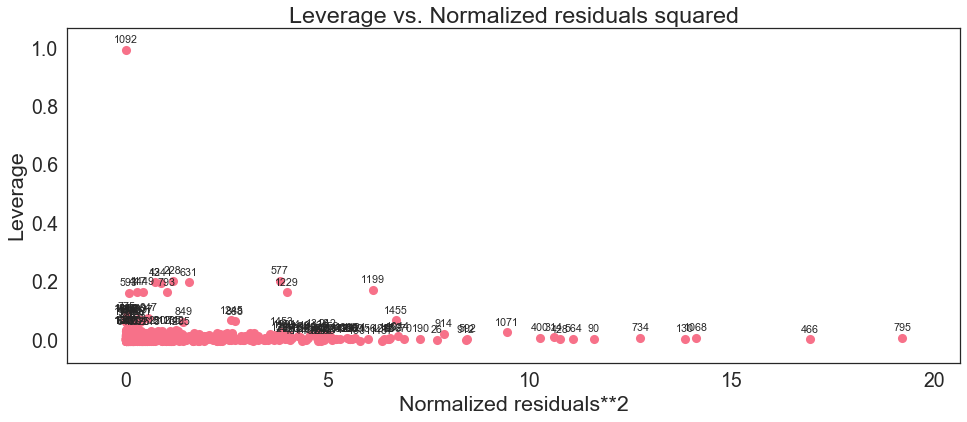

In [381]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(16,6))
fig = plot_leverage_resid2(olsres, ax = ax)
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.2})
# sns.despine()

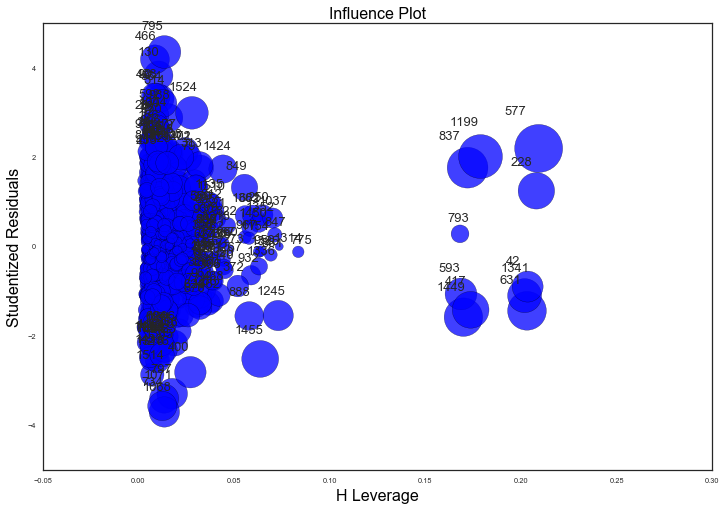

In [352]:
fig, ax = plt.subplots(1,figsize=(12,8))
fig = sm.graphics.influence_plot(olsres, ax=ax)
# sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.2})
# sns.despine()

In [300]:
# X2

In [594]:
boFilms_X2 = boFilms_Xs.drop(['sonyclassics','ifc','magnolia'],axis=1)

# Model: lasso_model_1
# Score: 0.294107568299
# ('screengems', 0.49461805715219753)
# ('wb-newline', 0.43574797537278126)
# ('buenavista', -0.39764032056324911)
# ('mgm', -0.32198917786850906)
# ('lionsgate', 0.32159344855242489)
# ('foxsearchlight', 0.28829011748180017)
# ('warnerbros', -0.2867880969321126)
# ('universal', 0.26153220684522988)
# ('fox', -0.24389956445041594)
# ('OscarNom', 0.20620218371353019)
# ('dreamworks', -0.20155014629411427)
# ('focus', 0.15319174815877357)
# ('miramax', -0.13273017725371911)
# ('paramount', 0.13060678740004614)
# ('newline', -0.045489711721831236)
# ('weinsteincompany', -0.031328067695009815)
# ('DURrelease', 0.011091265318445322)
# ('mv_runtime', -0.0022780591148762988)
# ('openDTheatre', 0.00031888203384475039)
# ('sonyclassics', 0.0)
# ('magnolia', 0.0)
# ('ifc', 0.0)






# X2=X#.loc[:,['DURrelease',
#             'openDTheatre', 
#             'mv_runtime', 
#             'OscarNom', 
#             'Comedy', 
#             'Drama', 
#             'Foreign', 
#             'Thriller', 
#             'Romance', 
#             'Action', 
#             'magnolia', 
#             'fox', 
#             'Fantasy', 
#             'Family', 
#             'ifc', 
#             'Documentary', 
#             'paramount', 
#             'sony', 
#             'sonyclassics', 
#             'buenavista', 
#             'weinsteincompany', 
#             'foxsearchlight', 
#             'universal', 
#             'warnerbros', 
#             'newline', 
#             'Sci-Fi', 
#             'lionsgate', 
#             'Period', 
#             'focus', 
#             'Adventure', 
#             'Animation', 
#             'screengems', 
#             'miramax', 
#             'Western', 
#             'wb-newline']]

# X2=X.drop(['fox'],axis=1)

# Model: lasso_model_1
# Score: 0.358781122575
# ('newline', 1.1694278590735945)
# ('focus', 1.1046473234307645)
# ('OscarNom', 1.0588848674448978)
# ('Fantasy', 0.85851165419976538)
# ('weinsteincompany', 0.8392367485832215)
# ('screengems', 0.75239397458685808)
# ('sonyclassics', 0.68599509495197808)
# ('Western', -0.64727336297239413)
# ('paramount', 0.60868285777883235)
# ('universal', 0.4858664488137131)
# ('Foreign', 0.47227926309035523)
# ('Documentary', 0.43856020596889161)
# ('Family', -0.43791550996872636)
# ('wb-newline', 0.41913430213791747)
# ('Adventure', -0.38085031755587612)
# ('sony', 0.35559612589731759)
# ('Animation', -0.3229344543744837)
# ('Period', -0.2901704785639817)
# ('foxsearchlight', 0.23994684614310927)
# ('Romance', 0.22547421294590267)
# ('ifc', -0.20724112511479692)
# ('magnolia', -0.19476212481475005)
# ('Action', -0.14548550609367006)
# ('miramax', 0.10463288028933507)
# ('Comedy', 0.066633304117808684)
# ('buenavista', -0.057118014559805218)
# ('lionsgate', 0.048824770186686559)
# ('Sci-Fi', -0.041508319644845075)
# ('Drama', 0.029111619733071831)
# ('Thriller', -0.027585524203031338)
# ('warnerbros', 0.023971896158476058)
# ('DURrelease', 0.0088815432566809287)
# ('mv_runtime', -0.0013900364258462687)
# ('openDTheatre', 0.00057840405235396592)
# ('fox', 0.0)

In [595]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        boFilms_X2, boFilms_ys, test_size=0.3, random_state=223)



X_train = sm.add_constant(X_train, has_constant='add')

model = sm.OLS(y_train, X_train) #, hasconst=False)
olsres = model.fit()

# olsres.resid

olsres.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     23.29
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           2.41e-67
Time:                        06:40:24   Log-Likelihood:                -1402.8
No. Observations:                1075   AIC:                             2846.
Df Residuals:                    1055   BIC:                             2945.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -0.9554      0.215     -4.439      0.000        -1.378    -0.533
openDTheatre         0.0003   3.61e-05      8.678      0.000         0.000     0.000
mv_runtime          -0.0024      0.002     -1.287      0.199        -0.006     0.001
DURrelease           0.0114      0.001     10.442      0.000         0.009     0.014
OscarNom             0.2253      0.114      1.968      0.049         0.001     0.450
warnerbros          -0.3167      0.102     -3.106      0.002        -0.517    -0.117
universal            0.2612      0.103      2.538      0.011         0.059     0.463
fox                 -0.2904      0.101     -2.873      0.004        -0.489    -0.092
buenavista          -0.4434      0.117     -3.797      0.000        -0.673    -0.214
paramount            0.1292      0.107      1.203      0.229        -0.082     0.340
miramax             -0.2141      0.190     -1.128      0.260        -0.587     0.158
newline             -0.1392      0.152     -0.913      0.361        -0.438     0.160
foxsearchlight       0.3926      0.226      1.736      0.083        -0.051     0.837
lionsgate            0.3395      0.135      2.522      0.012         0.075     0.604
mgm                 -0.3983      0.182     -2.187      0.029        -0.756    -0.041
screengems           0.5261      0.160      3.293      0.001         0.213     0.840
weinsteincompany    -0.1795      0.266     -0.675      0.500        -0.702     0.343
focus                0.2348      0.240      0.980      0.328        -0.236     0.705
wb-newline           0.5762      0.235      2.452      0.014         0.115     1.037
dreamworks          -0.3623      0.277     -1.306      0.192        -0.907     0.182
==============================================================================
Omnibus:                       81.822   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.314
Skew:                           0.454   Prob(JB):                     9.48e-41
Kurtosis:                       4.814   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
X_test = sm.add_constant(X_test, has_constant='add')

ypred = pd.DataFrame(olsres.predict(X_test))

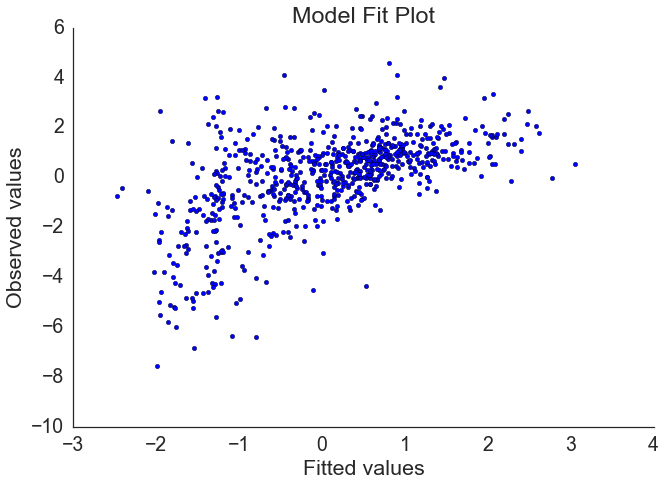

In [158]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(ypred, y_test)
# line_fit = sm.OLS(ypred, sm.add_constant(y_test, prepend=True), missing='drop', hasconst=True).fit()
# line_fit = sm.OLS(joinYs1.iloc[:,0], sm.add_constant(joinYs1.iloc[:,1], prepend=True), missing='drop', hasconst=True).fit()
# abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()

(array([   2.,    0.,    0.,    2.,    2.,    1.,    3.,    4.,    3.,
           5.,    2.,   10.,    9.,   13.,   10.,   12.,   23.,   17.,
          29.,   25.,   57.,   88.,  119.,  141.,  176.,  191.,  173.,
         127.,  114.,   97.,   69.,   58.,   30.,   16.,   14.,   14.,
          13.,    7.,    4.,    1.,    3.,    0.,    3.,    0.,    1.,
           0.,    0.,    1.,    0.,    2.]),
 array([-4.91593772, -4.72176461, -4.5275915 , -4.3334184 , -4.13924529,
        -3.94507218, -3.75089907, -3.55672596, -3.36255285, -3.16837975,
        -2.97420664, -2.78003353, -2.58586042, -2.39168731, -2.19751421,
        -2.0033411 , -1.80916799, -1.61499488, -1.42082177, -1.22664867,
        -1.03247556, -0.83830245, -0.64412934, -0.44995623, -0.25578313,
        -0.06161002,  0.13256309,  0.3267362 ,  0.52090931,  0.71508241,
         0.90925552,  1.10342863,  1.29760174,  1.49177485,  1.68594796,
         1.88012106,  2.07429417,  2.26846728,  2.46264039,  2.6568135 ,
         2.85098

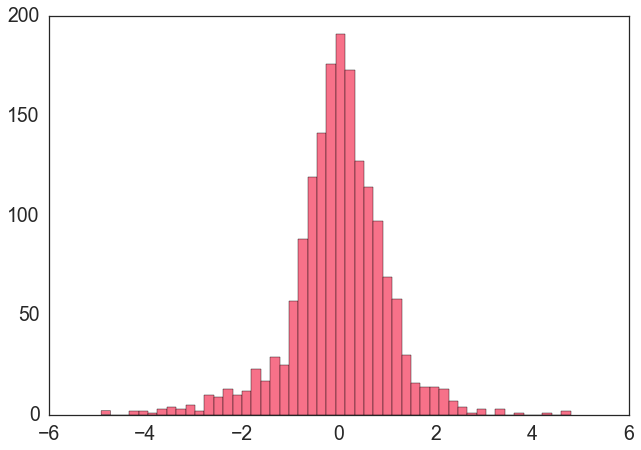

In [159]:
from scipy import stats
plt.hist(stats.zscore(olsres.resid), bins=50);
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
# sns.despine()

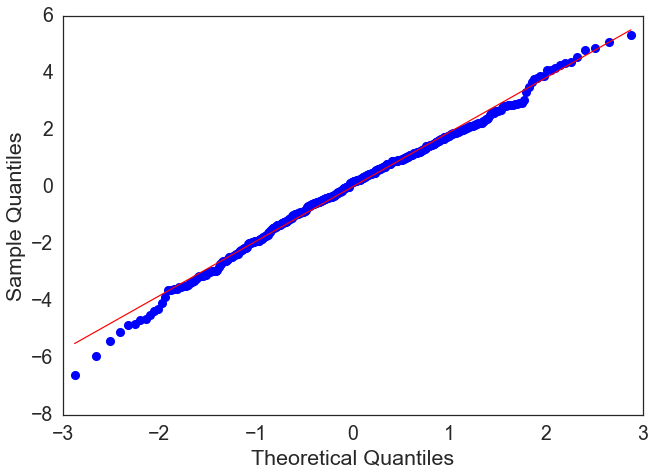

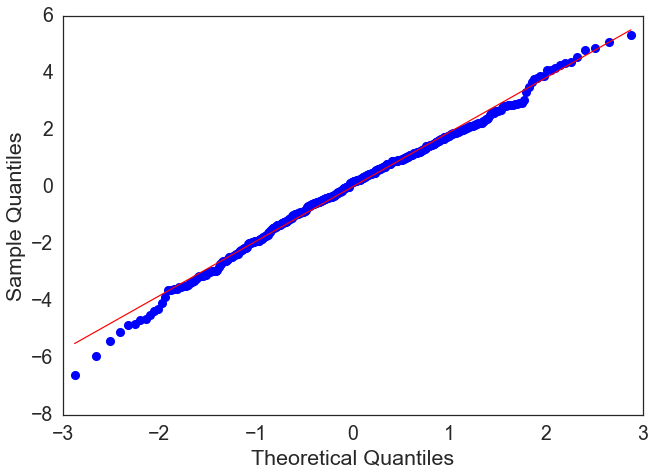

In [616]:
from statsmodels import graphics
graphics.gofplots.qqplot(olsres.resid, line='r')
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
# sns.despine()